In [1]:
from Funcs.Utility import *

In [2]:
p = os.path.join(PATH_INTERMEDIATE, 'calorie_count_binary_personal-15min.pkl')
X, y, groups, t, datetimes = load(p)

In [3]:
X

,PIF#participationStartTimestamp,PIF#age,PIF#openness,PIF#conscientiousness,PIF#neuroticism,PIF#extraversion,PIF#agreeableness,PIF#GHQ12,PIF#PSS10,PIF#CESD-R,...,PWR#RLV_SUP_TodayAfternoon,PWR#ETP#_TodayLateAfternoon,PWR#ASC#_TodayLateAfternoon,PWR#RLV_SUP_TodayLateAfternoon,PWR#ETP#_TodayEvening,PWR#ASC#_TodayEvening,PWR#RLV_SUP_TodayEvening,PWR#ETP#_TodayNight,PWR#ASC#_TodayNight,PWR#RLV_SUP_TodayNight
0,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21614,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21615,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21616,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21617,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Divide the features into different categories
feat_current = X.loc[:,[('#VAL' in str(x)) or ('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_dsc = X.loc[:,[('#DSC' in str(x))  for x in X.keys()]]  
feat_yesterday = X.loc[:,[('Yesterday' in str(x))  for x in X.keys()]]  
feat_today = X.loc[:,[('Today' in str(x))  for x in X.keys()]]  
feat_sleep = X.loc[:,[('Sleep' in str(x))  for x in X.keys()]]  
feat_time = X.loc[:,[('Time' in str(x))  for x in X.keys()]]  
feat_pif = X.loc[:,[('PIF' in str(x))  for x in X.keys()]]  
feat_ImmediatePast = X.loc[:,[('ImmediatePast_15' in str(x))  for x in X.keys()]]
#Divide the time window features into sensor/past stress label
feat_current_sensor = X.loc[:,[('#VAL' in str(x))  for x in X.keys()]]  
feat_current_ESM = X.loc[:,[('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_ImmediatePast_sensor = feat_ImmediatePast.loc[:,[('ESM' not in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_ImmediatePast_ESM = feat_ImmediatePast.loc[:,[('ESM'  in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_today_sensor = feat_today.loc[:,[('ESM' not in str(x))  for x in feat_today.keys()]]  
feat_today_ESM = feat_today.loc[:,[('ESM'  in str(x)) for x in feat_today.keys()]]  
feat_yesterday_sensor = feat_yesterday.loc[:,[('ESM' not in str(x)) for x in feat_yesterday.keys()]]  
feat_yesterday_ESM = feat_yesterday.loc[:,[('ESM'  in str(x)) for x in feat_yesterday.keys()]]

In [5]:
feat_baseline = pd.concat([ feat_time,feat_dsc,feat_current_sensor, feat_ImmediatePast_sensor],axis=1)
feat_final = pd.concat([feat_baseline  ], axis=1)
# # Fill NaN values with zeros
feat_final = feat_final.fillna(0)
X = feat_final
cats = X.columns[X.dtypes == bool]

In [6]:
cn = X.columns.tolist()
print(cn)

['PIF#participationStartTimestamp', 'Time#DOW=MON', 'Time#DOW=TUE', 'Time#DOW=WED', 'Time#DOW=THU', 'Time#DOW=FRI', 'Time#DOW=SAT', 'Time#DOW=SUN', 'Time#WKD=Y', 'Time#WKD=N', 'Time#HRN=DAWN', 'Time#HRN=MORNING', 'Time#HRN=AFTERNOON', 'Time#HRN=LATE_AFTERNOON', 'Time#HRN=EVENING', 'Time#HRN=NIGHT', 'Time#HRN=MIDNIGHT', 'APP_CAT#DSC', 'APP_CAT#DSC=UNKNOWNSYSTEMENTERSOCIALHEALTHWORKINFO', 'BAT_STA#DSC', 'BAT_STA#DSC=DISCHARGINGCHARGINGFULLNOT_CHARGING', 'BAT_PLG#DSC', 'BAT_PLG#DSC=UNDEFINEDACUSBWIRELESS', 'CALL_CNT#DSC', 'CALL_CNT#DSC=UNKNOWNMOBILEOTHERWORKHOMEUNDEFINEDMAIN', 'LOC_LABEL#DSC', 'LOC_LABEL#DSC=noneworkhome', 'SCR_EVENT#DSC', 'SCR_EVENT#DSC=SCREEN_OFFSCREEN_ONUSER_PRESENT', 'RING#DSC', 'RING#DSC=VIBRATESILENTNORMAL', 'CHG#DSC', 'CHG#DSC=DISCONNECTED', 'CHG#DSC=CONNECTED', 'BT_BondState#DSC', 'BT_BondState#DSC=NONEBONDEDBONDING', 'BT_DeviceType#DSC', 'BT_DeviceType#DSC=LECLASSICUNDEFINEDDUAL', 'BT_classType#DSC', 'BT_classType#DSC=UNDEFINEDPHONE_SMARTWEARABLE_WRIST_WATCHCOMPU

In [7]:
unique_parts = set()
for col in cn:
    part = col.split('#')[0]  # Get the part before the first '#'
    unique_parts.add(part)

# Print the unique parts
print(unique_parts)

{'BAT_PLG', 'SCR_DUR', 'DATA_RCV', 'BAT_STA', 'BAT_TMP', 'CALL_CNT', 'MSG_SNT', 'RING', 'BAT_LEV', 'Sleep', 'BT_BondState', 'Notification_VIS', 'DATA_MSNT', 'Time', 'DATA_SNT', 'INST_JAC', 'BT_classType', 'Notification_CAT', 'SCR_EVENT', 'CALL_DUR', 'APP_CAT', 'APP_DUR_UNKNOWN', 'MSG_RCV', 'PIF', 'CHG', 'Dozemode', 'PWR', 'MSG_ALL', 'LOC_LABEL', 'BT_DeviceType', 'DATA_MRCV'}


In [8]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [9]:
groups

array(['P001', 'P001', 'P001', ..., 'P135', 'P135', 'P135'], dtype='<U4')

In [10]:
datetimes

array([Timestamp('2021-11-24 11:39:29.541000+0900', tz='pytz.FixedOffset(540)'),
       Timestamp('2021-11-24 13:12:37.539000+0900', tz='pytz.FixedOffset(540)'),
       Timestamp('2021-11-24 14:29:48.862000+0900', tz='pytz.FixedOffset(540)'),
       ...,
       Timestamp('2022-01-05 17:30:48.498000+0900', tz='pytz.FixedOffset(540)'),
       Timestamp('2022-01-05 18:45:41.705000+0900', tz='pytz.FixedOffset(540)'),
       Timestamp('2022-01-05 19:42:24.457000+0900', tz='pytz.FixedOffset(540)')],
      dtype=object)

In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GroupKFold
from datetime import timedelta

# Convert datetimes to pandas datetime format if they aren't already
datetimes = pd.to_datetime(datetimes)

# Find the unique weeks in your data
week_starts = datetimes.to_period('W').unique()

# Sort weeks to ensure they're in chronological order
week_starts = sorted(week_starts)

for user in np.unique(groups):
    user_mask = groups == user
    user_weeks = datetimes[user_mask].to_period('W').unique()
    print(f"User {user} has {len(user_weeks)} unique weeks of data.")

# Use the last week as the test set
# Create an empty list to store indices for the test set
test_indices = []

for user in np.unique(groups):
    user_mask = groups == user
    user_datetimes = datetimes[user_mask]
    user_weeks = user_datetimes.to_period('W').unique()
    
    # Determine the number of test weeks based on the number of available weeks for the user
    if len(user_weeks) == 7:
        user_last_weeks = user_weeks[-3:]  # Last 3 weeks for users with 7 weeks of data
    elif len(user_weeks) == 6:
        user_last_weeks = user_weeks[-2:]  # Last 2 weeks for users with 6 weeks of data
    elif len(user_weeks) == 5:
        user_last_weeks = user_weeks[-1:]  # Last week for users with 5 weeks of data
    else:
        continue  # Skip users with fewer than 5 weeks of data (if applicable)
    
    # Create a mask for the test set based on the identified weeks
    user_test_mask = (datetimes.to_period('W').isin(user_last_weeks)) & user_mask
    test_indices.extend(np.where(user_test_mask)[0])
    
# Create the final test set
X_test = X.iloc[test_indices]
y_test = y[test_indices]
groups_test = groups[test_indices]

# Remove the test data from the training data
train_mask = ~X.index.isin(test_indices)
X_train_full = X[train_mask]
y_train_full = y[train_mask]
groups_train_full = groups[train_mask]
datetimes_train_full = datetimes[train_mask]

results = []

# Determine the maximum number of weeks that can be used for training, excluding the test set weeks
max_weeks = len(week_starts) - 3
print("max weeks")
print(max_weeks)
# Loop over the weeks, incrementally adding more data to the training set
for i in range(1, max_weeks):
    # Use the first `i` weeks for the training set
    train_weeks = week_starts[:i]
    incremental_train_mask = datetimes_train_full.to_period('W').isin(train_weeks)

    # Ensure consistent duration for all users in training
    X_train = X_train_full[incremental_train_mask]
    y_train = y_train_full[incremental_train_mask]
    groups_train = groups_train_full[incremental_train_mask]

    # Train the XGBoost model
    model = xgb.XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    # Predict probabilities on the test set
    y_prob = model.predict_proba(X_test)[:, 1]

    # Check if both classes are present in y_test
    if len(np.unique(y_test)) > 1:
        # Calculate AUC and store results
        auc = roc_auc_score(y_test, y_prob)
        results.append({
            'weeks_of_training': i,
            'auc': auc
        })
    else:
        print(f"Skipping AUC calculation for iteration {i} because only one class is present in y_test.")

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

from IPython.display import display
display(results_df)

User P001 has 5 unique weeks of data.
User P002 has 5 unique weeks of data.
User P003 has 5 unique weeks of data.
User P007 has 5 unique weeks of data.
User P008 has 6 unique weeks of data.
User P009 has 6 unique weeks of data.
User P010 has 5 unique weeks of data.
User P011 has 5 unique weeks of data.
User P013 has 6 unique weeks of data.
User P014 has 5 unique weeks of data.
User P015 has 5 unique weeks of data.
User P016 has 5 unique weeks of data.
User P018 has 5 unique weeks of data.
User P019 has 5 unique weeks of data.
User P020 has 5 unique weeks of data.
User P021 has 5 unique weeks of data.
User P022 has 4 unique weeks of data.
User P023 has 6 unique weeks of data.
User P024 has 5 unique weeks of data.
User P025 has 5 unique weeks of data.
User P026 has 5 unique weeks of data.
User P027 has 6 unique weeks of data.
User P028 has 5 unique weeks of data.
User P029 has 5 unique weeks of data.
User P030 has 5 unique weeks of data.
User P033 has 6 unique weeks of data.
User P034 ha

/tmp/ipykernel_1371825/72919930.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  week_starts = datetimes.to_period('W').unique()
/tmp/ipykernel_1371825/72919930.py:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  user_weeks = datetimes[user_mask].to_period('W').unique()
/tmp/ipykernel_1371825/72919930.py:29: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  user_weeks = user_datetimes.to_period('W').unique()
/tmp/ipykernel_1371825/72919930.py:42: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  user_test_mask = (datetimes.to_period('W').isin(user_last_weeks)) & user_mask
/tmp/ipykernel_1371825/72919930.py:67: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incremental_train_mask = datetimes_train_full.to_period('W').isin(train_weeks)


max weeks
5


/tmp/ipykernel_1371825/72919930.py:67: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incremental_train_mask = datetimes_train_full.to_period('W').isin(train_weeks)
/tmp/ipykernel_1371825/72919930.py:67: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incremental_train_mask = datetimes_train_full.to_period('W').isin(train_weeks)
/tmp/ipykernel_1371825/72919930.py:67: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incremental_train_mask = datetimes_train_full.to_period('W').isin(train_weeks)


,weeks_of_training,auc
0,1,0.711401
1,2,0.725328
2,3,0.717778
3,4,0.737556


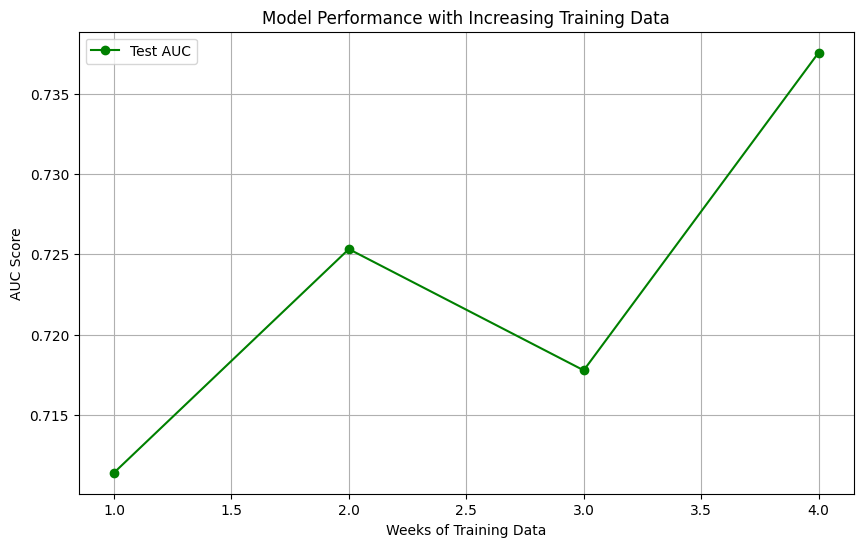

In [12]:
import matplotlib.pyplot as plt

def plot_auc_results(results_df):
    """
    Plots the AUC scores against the number of weeks of training data.

    Parameters:
    - results_df: DataFrame containing 'weeks_of_training' and 'auc' columns.
    """

    plt.figure(figsize=(10, 6))

    # Plot AUC Scores
    plt.plot(results_df['weeks_of_training'], results_df['auc'], marker='o', label='Test AUC', color='green')

    # Labels and title
    plt.xlabel('Weeks of Training Data')
    plt.ylabel('AUC Score')
    plt.title('Model Performance with Increasing Training Data')
    plt.legend()

    # Grid and show plot
    plt.grid(True)
    plt.show()

# Use the plot function after generating the results
plot_auc_results(results_df)


/tmp/ipykernel_1371825/2977167885.py:72: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incremental_train_mask = datetimes_train_full.to_period('W').isin(train_weeks)


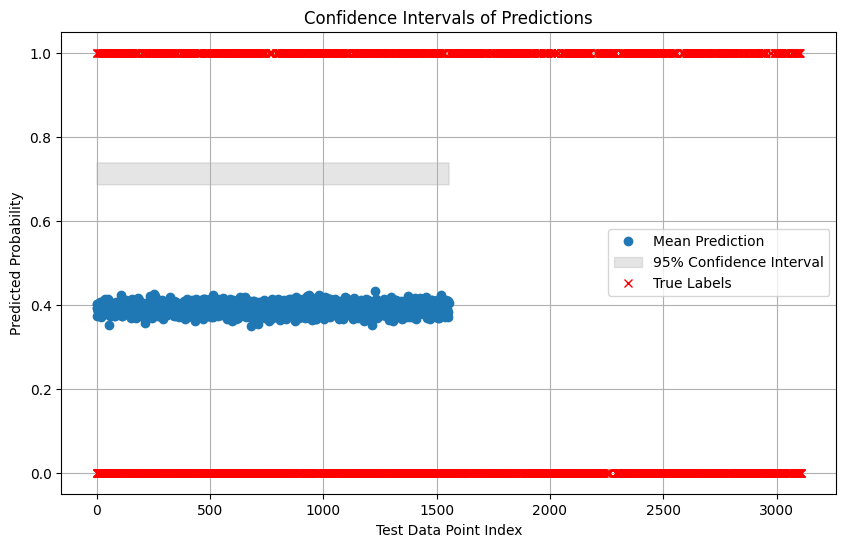

/tmp/ipykernel_1371825/2977167885.py:72: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incremental_train_mask = datetimes_train_full.to_period('W').isin(train_weeks)


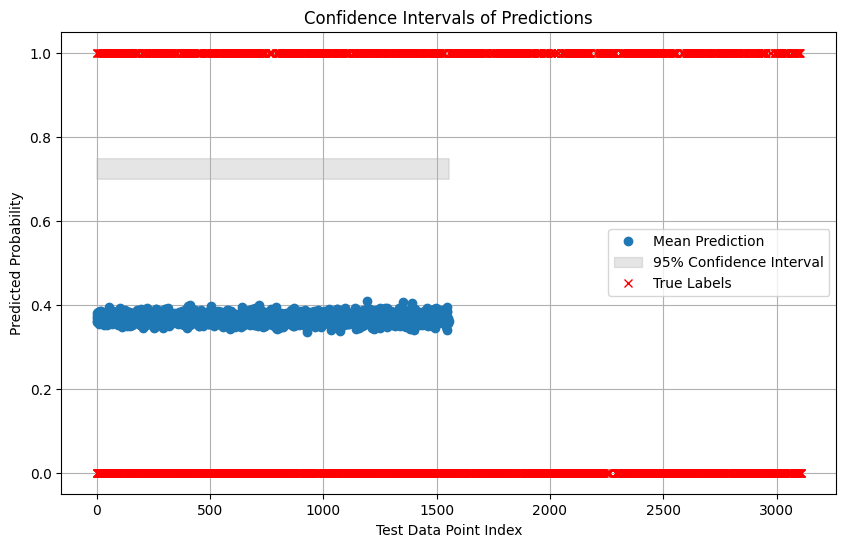

/tmp/ipykernel_1371825/2977167885.py:72: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incremental_train_mask = datetimes_train_full.to_period('W').isin(train_weeks)


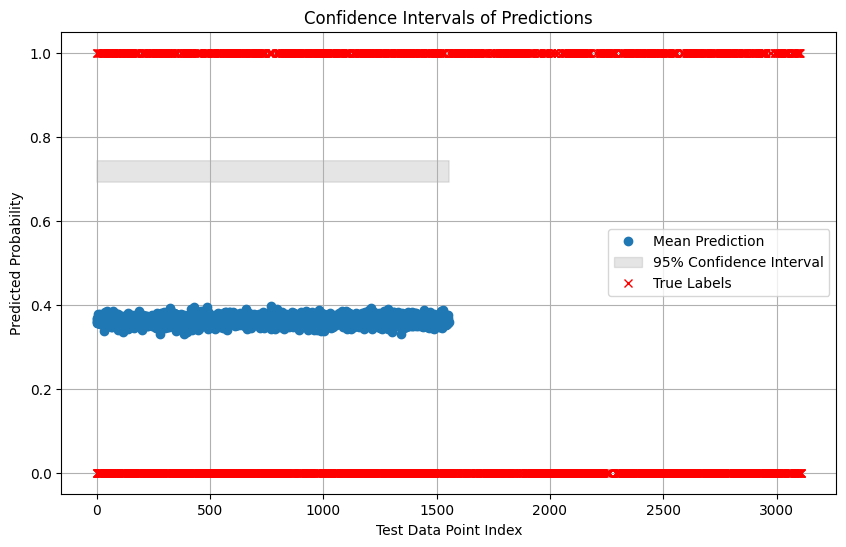

/tmp/ipykernel_1371825/2977167885.py:72: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incremental_train_mask = datetimes_train_full.to_period('W').isin(train_weeks)


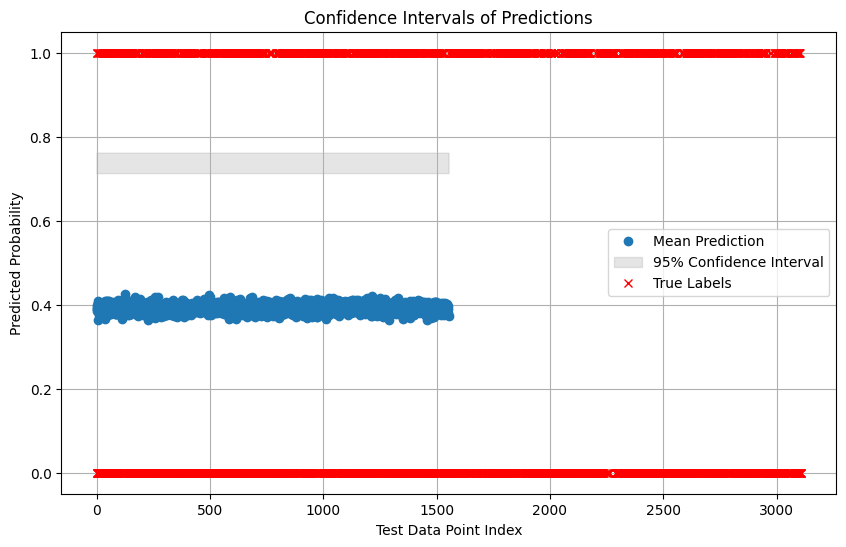

,weeks_of_training,mean_auc,lower_ci,upper_ci
0,1,0.711391,0.686636,0.738780
1,2,0.725298,0.699928,0.748965
2,3,0.718008,0.693065,0.744013
3,4,0.737642,0.713339,0.761927


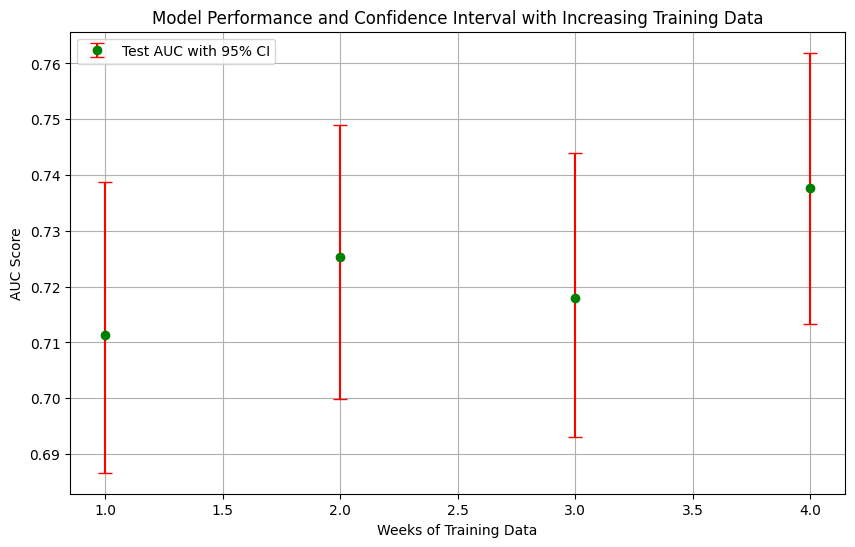

In [13]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

def calculate_auc_and_ci_from_predictions(bootstrap_predictions, y_true, ci=95):
    """
    Calculate AUC and confidence interval directly from bootstrap predictions.
    
    Parameters:
    - bootstrap_predictions: List of predicted probabilities from bootstrapped test sets
    - y_true: Original true labels for each resampled test set
    - ci: Confidence interval percentage
    
    Returns:
    - mean_auc: Mean AUC score across bootstrap samples
    - lower_ci: Lower bound of the confidence interval
    - upper_ci: Upper bound of the confidence interval
    """
    aucs = []
    for i in range(len(bootstrap_predictions)):
        auc = roc_auc_score(y_true[i], bootstrap_predictions[i])
        aucs.append(auc)
    
    mean_auc = np.mean(aucs)
    lower_ci = np.percentile(aucs, (100 - ci) / 2)
    upper_ci = np.percentile(aucs, 100 - (100 - ci) / 2)
    
    return mean_auc, lower_ci, upper_ci

def bootstrap_resample_test_set(X_test, y_test, n_bootstraps=1000, test_size=0.5):
    resampled_X_tests = []
    resampled_y_tests = []
    
    for _ in range(n_bootstraps):
        X_resampled, y_resampled = resample(X_test, y_test, replace=True, n_samples=int(len(X_test) * test_size))
        resampled_X_tests.append(X_resampled)
        resampled_y_tests.append(y_resampled)
    
    return resampled_X_tests, resampled_y_tests

def train_and_predict_bootstrap(X_train, y_train, resampled_X_tests, resampled_y_tests, n_estimators=100):
    model = xgb.XGBClassifier(n_estimators=n_estimators, eval_metric='logloss')
    model.fit(X_train, y_train)
    
    bootstrap_predictions = []
    for X_resampled in resampled_X_tests:
        preds = model.predict_proba(X_resampled)[:, 1]
        bootstrap_predictions.append(preds)
    
    return bootstrap_predictions

def plot_confidence_intervals(X_test, y_test, bootstrap_predictions, lower_bounds, upper_bounds):
    plt.figure(figsize=(10, 6))
    mean_predictions = np.mean(bootstrap_predictions, axis=0)
    plt.plot(mean_predictions, 'o', label='Mean Prediction')
    plt.fill_between(range(len(mean_predictions)), lower_bounds, upper_bounds, color='gray', alpha=0.2, label=f'95% Confidence Interval')
    plt.plot(y_test, 'x', label='True Labels', color='red')
    plt.xlabel('Test Data Point Index')
    plt.ylabel('Predicted Probability')
    plt.title('Confidence Intervals of Predictions')
    plt.legend()
    plt.grid(True)
    plt.show()

results = []

for i in range(1, max_weeks):
    train_weeks = week_starts[:i]
    incremental_train_mask = datetimes_train_full.to_period('W').isin(train_weeks)

    X_train = X_train_full[incremental_train_mask]
    y_train = y_train_full[incremental_train_mask]
    groups_train = groups_train_full[incremental_train_mask]

    resampled_X_tests, resampled_y_tests = bootstrap_resample_test_set(X_test, y_test, n_bootstraps=1000)
    bootstrap_predictions = train_and_predict_bootstrap(X_train, y_train, resampled_X_tests, resampled_y_tests)
    
    mean_auc, lower_ci, upper_ci = calculate_auc_and_ci_from_predictions(bootstrap_predictions, resampled_y_tests)

    results.append({
        'weeks_of_training': i,
        'mean_auc': mean_auc,
        'lower_ci': lower_ci,
        'upper_ci': upper_ci
    })

    plot_confidence_intervals(X_test, y_test, bootstrap_predictions, lower_ci, upper_ci)

results_df = pd.DataFrame(results)
display(results_df)

def plot_auc_with_confidence_intervals(results_df):
    plt.figure(figsize=(10, 6))
    plt.errorbar(results_df['weeks_of_training'], results_df['mean_auc'], 
                 yerr=[results_df['mean_auc'] - results_df['lower_ci'], results_df['upper_ci'] - results_df['mean_auc']],
                 fmt='o', ecolor='red', capsize=5, label='Test AUC with 95% CI', color='green')
    plt.xlabel('Weeks of Training Data')
    plt.ylabel('AUC Score')
    plt.title('Model Performance and Confidence Interval with Increasing Training Data')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_auc_with_confidence_intervals(results_df)

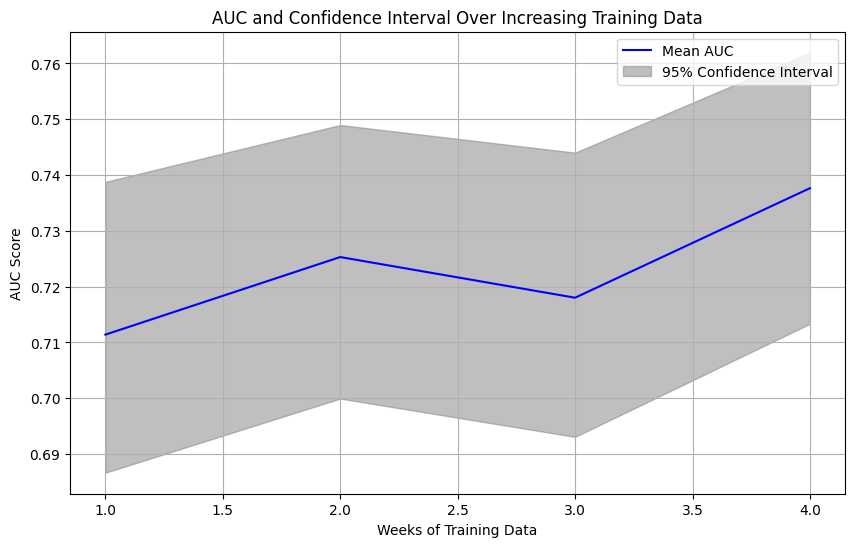

In [14]:
import matplotlib.pyplot as plt

# Extract relevant data from results_df
weeks_of_training = results_df['weeks_of_training']
mean_auc = results_df['mean_auc']
lower_ci = results_df['lower_ci']
upper_ci = results_df['upper_ci']

# Visualization
plt.figure(figsize=(10, 6))

# Plot the mean AUC over time
plt.plot(weeks_of_training, mean_auc, label='Mean AUC', color='blue')

# Fill the area between the lower and upper confidence intervals
plt.fill_between(weeks_of_training, lower_ci, upper_ci, color='gray', alpha=0.5, label='95% Confidence Interval')

# Add labels and title
plt.title('AUC and Confidence Interval Over Increasing Training Data')
plt.xlabel('Weeks of Training Data')
plt.ylabel('AUC Score')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()